In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('weatherAUS.csv')
data = data.fillna(0)

drop = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data = data.drop(columns = drop)
data = (data - data.mean()) / data.std()
#X = StandardScaler().fit_transform(data)
X = data.values


In [3]:
def k_means_clustering(X, k, max_iters=100):
 #Initialization of Centroids:
 centroids = X[np.random.choice(X.shape[0], k, replace = False)]
 for _ in range(max_iters):
   distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis = 2)
   labels = np.argmin(distances, axis=1)
   new_centroids = np.array([X[labels == i].mean(axis = 0) for i in range(k)])
   if np.all(centroids == new_centroids):
       break
   centroids = new_centroids
 return centroids, labels

In [4]:
def elbow_method(X, max_clusters = 10):
 distortions = []
 for k in range(1, max_clusters + 1):
  centroids, labels = k_means_clustering(X, k)
  distortion = np.sum((X - centroids[labels]) ** 2)
  distortions.append(distortion)
 plt.plot(range(1, max_clusters + 1), distortions, marker='o')
 plt.title('Elbow Method for Optimal k')
 plt.xlabel('Number of Clusters (k)')
 plt.ylabel('Distortion')
 plt.show()

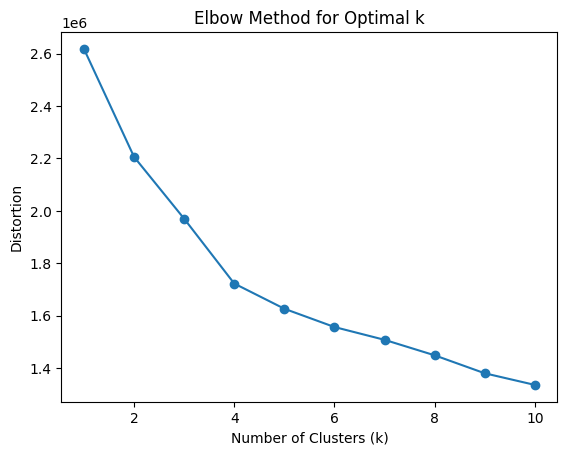

In [5]:
elbow_method(X)

In [6]:
k = 4

In [7]:
centroids, labels = k_means_clustering(X, k)
print("Cluster Centers:")
print(centroids)

Cluster Centers:
[[-0.59853837 -0.43003359 -0.21234049 -0.37911802 -0.15253361 -0.32432643
  -0.35517183 -0.29880384  0.22329919 -0.00636406  0.34892361  0.34937695
  -0.28492147 -0.29449107 -0.54492318 -0.36429436 -0.30296053 -0.31010512]
 [-0.48736777 -0.45514038 -0.02507564 -0.66825234 -0.78165466 -0.57648467
  -0.41838458 -0.63136492 -0.12317382 -0.1713902  -2.91066194 -2.9183902
  -0.52125061 -0.57868086 -0.5145925  -0.56016432 -0.03745968 -0.03660449]
 [ 0.78709787  0.97918555 -0.22760549  0.76827546  0.63949368  0.26178352
   0.24775089  0.27689712 -0.64181789 -0.54342933  0.3266896   0.32467791
  -0.06946926 -0.05015911  0.9343392   0.92258287 -0.38894503 -0.30449189]
 [ 0.11860391 -0.46975887  0.71278184 -0.14648452 -0.29552249  0.45588112
   0.4536454   0.41602073  0.61234625  0.88906396  0.32008003  0.32596322
   0.84596099  0.86192533 -0.17661437 -0.45009166  1.11176877  1.00009909]]


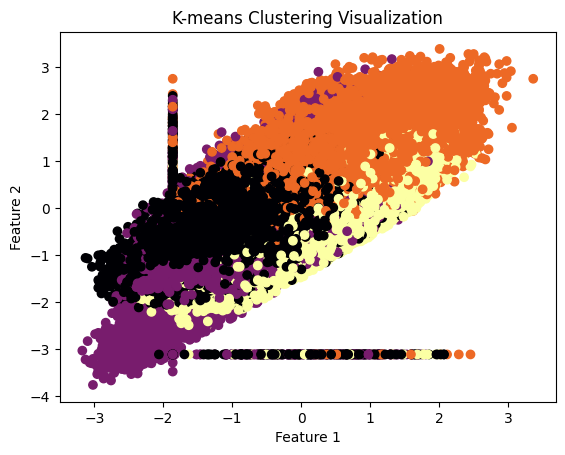

In [8]:
# Plot clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='inferno', alpha=1)
plt.title('K-means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()